<a href="https://colab.research.google.com/github/mayank458746/My_Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset

In [93]:
!git clone https://github.com/mayank458746/ML_Datasets
%cd ML_Dataset

fatal: destination path 'ML_Datasets' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'ML_Dataset'
/content/ML_Datasets/ML_Datasets/ML_Datasets/ML_Datasets/ML_Datasets


Importiing the Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [95]:
#loading csv data to pandas dataframe
gold_data = pd.read_csv('/content/ML_Datasets/ML_Datasets/gld_price_data.csv')

In [96]:
#print first five rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [97]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [98]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [99]:
#getting info about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [100]:
 #checking the missing values
 gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [101]:
#statisitcal measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1) Positive Correlation

2) Negative Correlation

In [102]:
correlation = gold_data.corr()

<AxesSubplot:>

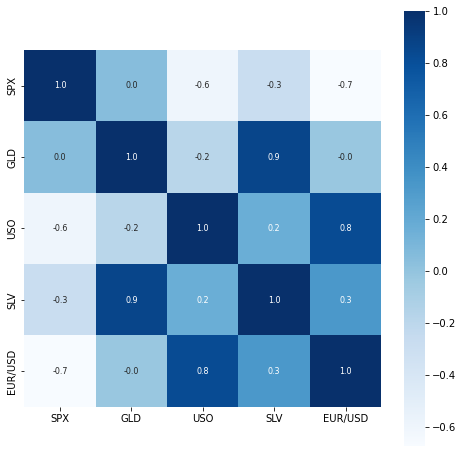

In [103]:
#constructing the heat map
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [105]:
#correlation value of Open
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

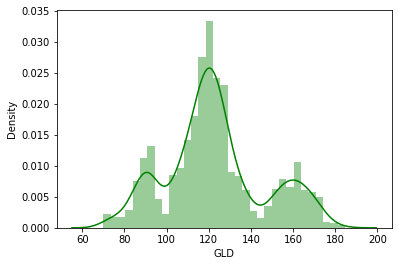

In [106]:
#checking the distribution of opening value of gold
sns.distplot(gold_data['GLD'],color = 'green')

Splitting the feature and the target

In [107]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [108]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [109]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


 Splitting data into training and testing

In [110]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =2)

Model Training - Random Forest Regressor

In [111]:
regressor = RandomForestRegressor(n_estimators=100)

In [112]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [113]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [114]:
print(test_data_prediction)

[168.65119935  81.92319986 116.43750048 127.5860007  120.63970103
 154.768298   150.32009821 126.0592005  117.64219869 125.94630098
 117.02030077 171.78240081 141.71089897 168.13619817 115.22969971
 118.16130051 138.4420032  170.43510165 158.80110312 160.56289941
 155.08290034 125.33649996 175.60889931 157.3423035  125.17470044
  93.9602999   77.6305001  120.39480016 119.11209952 167.44649935
  88.21700012 125.36720015  91.22080061 117.87819981 121.10589871
 136.20850121 115.74630124 115.03780094 146.59769956 107.18730084
 104.55930229  87.24099835 126.57600046 118.00619985 154.54489887
 119.63210012 108.35160038 108.03059785  92.99940007 127.16469757
  74.70500053 113.64729867 121.44260013 111.36909909 118.95569873
 120.74319945 159.12619929 168.10300153 146.84779725  85.72469867
  93.90600034  86.77479877  90.52630013 118.84980078 126.41350113
 127.72170017 169.39379937 122.30319948 117.52429907  98.5461004
 167.97220188 143.02589785 131.70800245 121.27230208 120.68149951
 119.832700

In [115]:
# R squared error
error_score_1 = metrics.r2_score(Y_test,test_data_prediction) 
print(error_score_1)

0.9896398436675151


Comparing the actual values and the predicted values

In [118]:
Y_test  = list(Y_test)

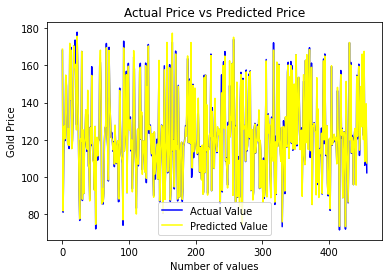

In [119]:
plt.plot(Y_test,color='blue',label = 'Actual Value')
plt.plot(test_data_prediction,color='yellow',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()